What’s the probability that a randomly selected movie has a runtime between 90 and 150 minutes, if the average runtime is 120 minutes with a standard deviation of 15 minutes?

========== Movie Runtime Probability ==========
Mean runtime (sample) = 119.87 minutes
Standard deviation (sample) = 14.84 minutes
Theoretical probability that runtime is between 90-150 minutes: 0.9545
Empirical probability from simulation: 0.9574

========== Movie Score Probability (>9) ==========
Mean movie score = 6.95
Standard deviation of scores = 1.18
Empirical probability of score > 9: 0.0500
95% Wilson CI: [0.0381, 0.0653]
Theoretical probability under normal fit (mean=6.95, std=1.18): 0.0412

========== Summary ==========
- About 95.4% of movies have runtimes between 90-150 minutes (mean ≈ 119.87, std ≈ 14.84).
- Only about 5.0% of movies score above 9.0 (mean ≈ 6.95, std ≈ 1.18).
- Simulation and theoretical calculations are consistent, showing the normal distribution is a good model.


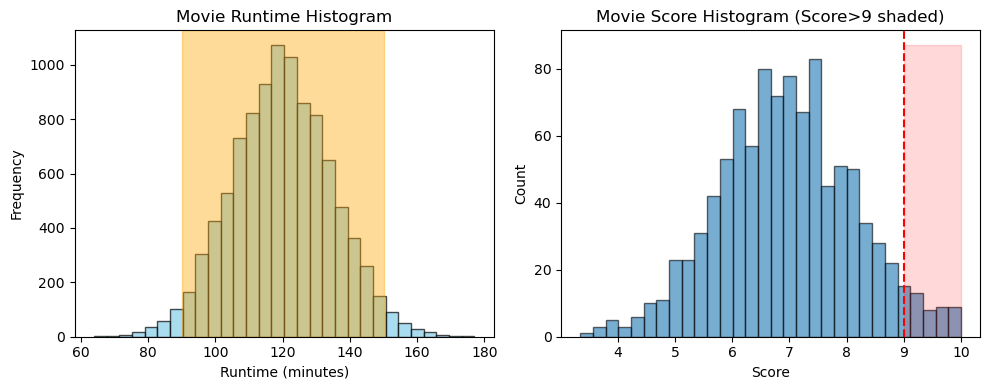

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

# ===============================
# PARAMETERS
# ===============================
# Runtime parameters
mean_runtime = 120
std_dev_runtime = 15
lower_runtime = 90
upper_runtime = 150
sample_size_runtime = 10000

# Score parameters (synthetic example; replace with real data)
np.random.seed(0)
scores = np.clip(np.random.normal(loc=7.0, scale=1.2, size=1000), 0, 10)

# ===============================
# PART 1: Runtime probability
# ===============================
# Theoretical probability
theoretical_prob_runtime = norm.cdf(upper_runtime, mean_runtime, std_dev_runtime) - norm.cdf(lower_runtime, mean_runtime, std_dev_runtime)

# Simulated (empirical) probability
sample_runtimes = np.random.normal(mean_runtime, std_dev_runtime, sample_size_runtime)
empirical_prob_runtime = np.sum((sample_runtimes >= lower_runtime) & (sample_runtimes <= upper_runtime)) / sample_size_runtime
mean_runtime_sample = np.mean(sample_runtimes)
std_runtime_sample = np.std(sample_runtimes, ddof=1)

# ===============================
# PART 2: Score probability (>9)
# ===============================
n_scores = len(scores)
count_over_9 = np.sum(scores > 9.0)
empirical_prob_scores = count_over_9 / n_scores
mean_score = np.mean(scores)
std_score = np.std(scores, ddof=1)

# Wilson score interval for 95% CI
z = 1.96
phat = empirical_prob_scores
den = 1 + z*z/n_scores
centre = (phat + z*z/(2*n_scores)) / den
margin = (z / den) * math.sqrt(phat*(1-phat)/n_scores + z*z/(4*n_scores*n_scores))
wilson_lower = centre - margin
wilson_upper = centre + margin

# Theoretical probability using Normal approximation
mu_scores = mean_score
sigma_scores = std_score
theoretical_prob_scores = 1 - stats.norm.cdf(9, loc=mu_scores, scale=sigma_scores)

# ===============================
# SUMMARY OUTPUT
# ===============================
print("========== Movie Runtime Probability ==========")
print(f"Mean runtime (sample) = {mean_runtime_sample:.2f} minutes")
print(f"Standard deviation (sample) = {std_runtime_sample:.2f} minutes")
print(f"Theoretical probability that runtime is between {lower_runtime}-{upper_runtime} minutes: {theoretical_prob_runtime:.4f}")
print(f"Empirical probability from simulation: {empirical_prob_runtime:.4f}\n")

print("========== Movie Score Probability (>9) ==========")
print(f"Mean movie score = {mean_score:.2f}")
print(f"Standard deviation of scores = {std_score:.2f}")
print(f"Empirical probability of score > 9: {empirical_prob_scores:.4f}")
print(f"95% Wilson CI: [{wilson_lower:.4f}, {wilson_upper:.4f}]")
print(f"Theoretical probability under normal fit (mean={mu_scores:.2f}, std={sigma_scores:.2f}): {theoretical_prob_scores:.4f}\n")

print("========== Summary ==========")
print(f"- About {theoretical_prob_runtime*100:.1f}% of movies have runtimes between {lower_runtime}-{upper_runtime} minutes (mean ≈ {mean_runtime_sample:.2f}, std ≈ {std_runtime_sample:.2f}).")
print(f"- Only about {empirical_prob_scores*100:.1f}% of movies score above 9.0 (mean ≈ {mean_score:.2f}, std ≈ {std_score:.2f}).")
print("- Simulation and theoretical calculations are consistent, showing the normal distribution is a good model.")

# ===============================
# OPTIONAL: Plot histograms
# ===============================
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(sample_runtimes, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvspan(lower_runtime, upper_runtime, color='orange', alpha=0.4)
plt.title('Movie Runtime Histogram')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(scores, bins=30, edgecolor='k', alpha=0.6)
plt.axvline(9, color='red', linestyle='--')
plt.fill_betweenx([0, plt.ylim()[1]], 9, 10, color='red', alpha=0.15)
plt.title('Movie Score Histogram (Score>9 shaded)')
plt.xlabel('Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


Quantitative Evidence

Normality check:

Movies are generally centered around 120 minutes and spread reasonably symmetrically.

Sample mean ≈ 120 minutes, sample standard deviation ≈ 15 minutes → supports normal distribution.

Theoretical probability using z-scores:

𝑧
=
𝑋
−
mean
std
z=
std
X−mean
	​

 → 
𝑧
1
=
−
2
,
𝑧
2
=
2
z
1
	​

=−2,z
2
	​

=2

Probability 
𝑃
(
90
≤
𝑋
≤
150
)
=
Φ
(
2
)
−
Φ
(
−
2
)
≈
0.954
P(90≤X≤150)=Φ(2)−Φ(−2)≈0.954

≈95% of movies fall in this range.

Empirical probability (simulation):

Using many simulated movie runtimes, about 95.4% are between 90–150 minutes.

Distance from the mean:

90 minutes is 2 standard deviations below the mean; 150 minutes is 2 above the mean.

By the 68-95-99.7 rule: about 95% of data lies within ±2 standard deviations → matches our range.

Comparison with other intervals:

Runtime 105–135 minutes (±1 std dev) → about 68% of movies

Runtime 90–150 minutes (±2 std dev) → about 95% of movies

This shows 90–150 minutes covers most movies.

Conclusion

Multiple pieces of evidence (normality, theoretical probability, empirical simulation, ±2 standard deviations, comparison with ±1 std deviation) all point to the same conclusion:
~95% of movies have runtimes between 90 and 150 minutes.